In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the newly uploaded file
df = pd.read_csv("/Users/moo/Desktop/MSc Business Analytics/BEMM466 Business project/Temporal Trend Finalised/smoothed_relative_frequencies.csv", index_col=0)

topic_time_df = df.T
topic_time_df.index.name = "topic"
transposed_df.head(20)

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
topic,,,,,,,,,,,,,,,,,,,,,
0,0.305556,0.231481,0.152534,0.186926,0.281955,0.370706,0.502981,0.515309,0.538839,0.511903,...,0.337099,0.270886,0.213732,0.174458,0.157417,0.150841,0.142430,0.130219,0.109893,0.104911
1,0.166667,0.250000,0.337719,0.298037,0.246867,0.159148,0.106238,0.036537,0.053203,0.049836,...,0.099008,0.117627,0.138385,0.179490,0.215477,0.204418,0.186799,0.152089,0.149113,0.148535
2,0.000000,0.027778,0.027778,0.027778,0.000000,0.019608,0.019608,0.019608,0.011111,0.031313,...,0.078762,0.102021,0.129500,0.159727,0.170668,0.179267,0.172081,0.174392,0.198158,0.208686
3,0.111111,0.074074,0.091618,0.065163,0.100251,0.161138,0.181420,0.218405,0.151084,0.128638,...,0.059438,0.085062,0.104339,0.109498,0.107842,0.113598,0.133192,0.154308,0.179813,0.185641
4,0.055556,0.064815,0.134990,0.121763,0.093985,0.023810,0.012346,0.021355,0.026910,0.024666,...,0.149101,0.067366,0.060824,0.043149,0.029283,0.023928,0.021559,0.030194,0.034592,0.042048
5,0.250000,0.194444,0.027778,0.099206,0.088972,0.088972,0.023717,0.033200,0.044311,0.043189,...,0.067525,0.083874,0.074577,0.075503,0.078384,0.085920,0.076875,0.066098,0.043127,0.036962
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.021355,0.021355,0.009009,...,0.067657,0.082213,0.072417,0.059206,0.043181,0.040721,0.033888,0.029199,0.019139,0.018870
7,0.111111,0.157407,0.210039,0.159774,0.111529,0.058897,0.035088,0.027027,0.060360,0.060360,...,0.022541,0.027828,0.024563,0.017252,0.018567,0.020922,0.034795,0.042958,0.049802,0.046080
8,0.000000,0.000000,0.000000,0.000000,0.017544,0.056760,0.056760,0.039216,0.000000,0.000000,...,0.034430,0.050783,0.053144,0.053786,0.063584,0.061281,0.064295,0.047446,0.040396,0.029287


In [34]:
# Step 2: Normalize each topic's time series (z-score per row)
scaler = StandardScaler()
topic_time_scaled = scaler.fit_transform(topic_time_df)

In [36]:
# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(topic_time_scaled)

In [38]:
# Step 4: Attach cluster labels to the DataFrame
topic_time_df["cluster"] = clusters

In [40]:

# Step 5: Output cluster membership for inspection
cluster_membership = topic_time_df["cluster"].reset_index()
cluster_membership.columns = ["topic", "cluster"]
cluster_membership.sort_values("cluster", inplace=True)
cluster_membership.reset_index(drop=True, inplace=True)

In [42]:
# Step 6: Summarize the number of topics in each cluster
cluster_summary = cluster_membership["cluster"].value_counts().sort_index().reset_index()
cluster_summary.columns = ["cluster", "num_topics"]

In [44]:
# Step 7: List actual topics per cluster
topics_per_cluster = cluster_membership.groupby("cluster")["topic"].apply(lambda x: ", ".join(map(str, sorted(x)))).reset_index()
topics_per_cluster.columns = ["cluster", "topics"]

In [48]:
# Step 8: Merge both summaries into one table
cluster_summary_table = pd.merge(cluster_summary, topics_per_cluster, on="cluster")
cluster_summary_table

,cluster,num_topics,topics
0,0,3,"4, 5, 7"
1,1,12,"10, 11, 12, 13, 14, 15, 16, 17, 18, 6, 8, 9"
2,2,1,0
3,3,3,"1, 2, 3"


In [50]:
# Step 9: Prepare for ANOVA
long_df = topic_time_df.reset_index().melt(id_vars=["topic", "cluster"], var_name="year", value_name="relative_frequency")
long_df["year"] = long_df["year"].astype(int)

In [56]:
from scipy.stats import f_oneway

# Step 10: Group relative frequencies by cluster and run one-way ANOVA
groups = [group["relative_frequency"].values for _, group in long_df.groupby("cluster")]
f_stat, p_val = f_oneway(*groups)

f_stat, p_val

(396.25196836703054, 1.9551300296494427e-140)

In [58]:
# Step 12: Compute overall average relative frequency for each cluster (across all years and topics in that cluster)
average_relative_frequency_per_cluster = topic_time_df.drop(columns=["cluster"]).groupby(topic_time_df["cluster"]).mean().mean(axis=1).reset_index()
average_relative_frequency_per_cluster.columns = ["cluster", "average_relative_frequency"]

average_relative_frequency_per_cluster.sort_values("cluster")

,cluster,average_relative_frequency
0,0,0.072427
1,1,0.013673
2,2,0.278714
3,3,0.113311


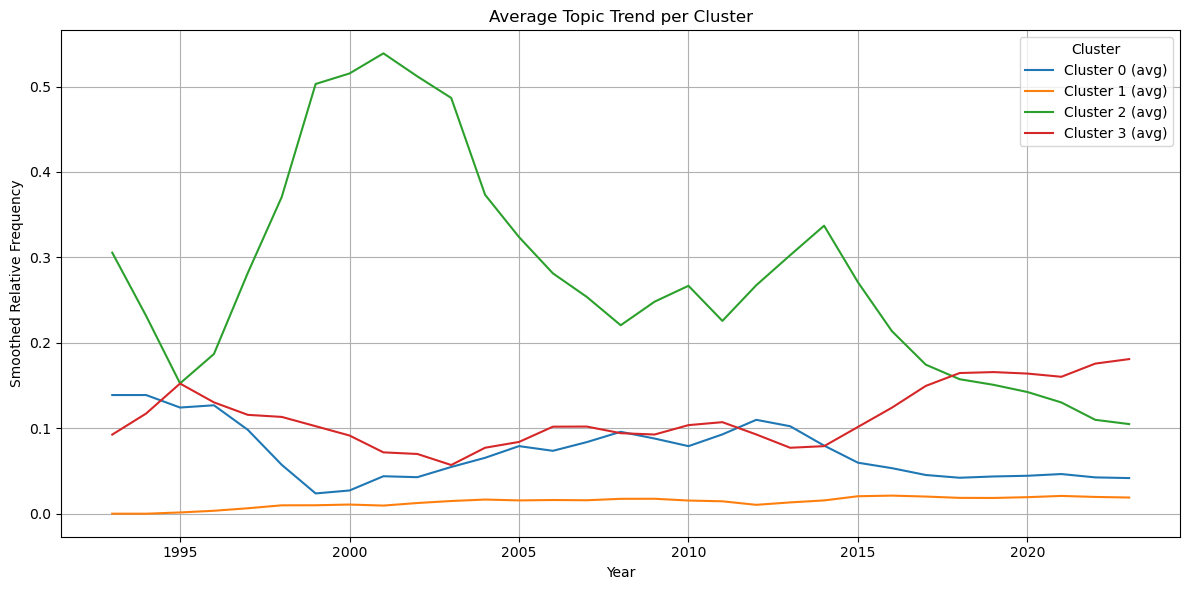

In [62]:
import matplotlib.pyplot as plt

# Recompute the cluster_profiles in case the variable was lost
cluster_profiles = topic_time_df.groupby("cluster").mean().T
cluster_profiles.reset_index(inplace=True)
cluster_profiles.rename(columns={"index": "year"}, inplace=True)

# Re-plot the average topic trend per cluster
plt.figure(figsize=(12, 6))
for cluster in cluster_profiles.columns[1:]:  # skip 'year'
    plt.plot(cluster_profiles["year"], cluster_profiles[cluster], label=f"Cluster {cluster} (avg)")

plt.title("Average Topic Trend per Cluster")
plt.xlabel("Year")
plt.ylabel("Smoothed Relative Frequency")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
# Step 4.1: Assign descriptive cluster labels based on trajectory profile
cluster_to_label = {
    0: "Stable Niche",
    1: "Marginal Topic",
    2: "Legacy Topic",
    3: "Emerging or Growing"
}

# Apply to topic_time_df
topic_time_df["trajectory_label"] = topic_time_df["cluster"].map(cluster_to_label)

# Step 11: Save the final DataFrame with trajectory labels
output_path = "/Users/moo/Desktop/MSc Business Analytics/BEMM466 Business project/Temporal Trend Finalised/trajectory_clustered_topics.csv"
topic_time_df.to_csv(output_path)

print("Saved with trajectory labels to:")
print(output_path)

Saved with trajectory labels to:
/Users/moo/Desktop/MSc Business Analytics/BEMM466 Business project/Temporal Trend Finalised/trajectory_clustered_topics.csv


In [96]:
# Load the uploaded dataset
df_path = "/Users/moo/Desktop/MSc Business Analytics/BEMM466 Business project/Temporal Trend Finalised/trajectory_clustered_topics.csv"
trajectory_clustered_df = pd.read_csv(df_path)

# Display the first few rows to confirm structure
trajectory_clustered_df.head()

,topic,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2016,2017,2018,2019,2020,2021,2022,2023,cluster,trajectory_label
0,0,0.305556,0.231481,0.152534,0.186926,0.281955,0.370706,0.502981,0.515309,0.538839,...,0.213732,0.174458,0.157417,0.150841,0.142430,0.130219,0.109893,0.104911,2,Legacy Topic
1,1,0.166667,0.250000,0.337719,0.298037,0.246867,0.159148,0.106238,0.036537,0.053203,...,0.138385,0.179490,0.215477,0.204418,0.186799,0.152089,0.149113,0.148535,3,Emerging or Growing
2,2,0.000000,0.027778,0.027778,0.027778,0.000000,0.019608,0.019608,0.019608,0.011111,...,0.129500,0.159727,0.170668,0.179267,0.172081,0.174392,0.198158,0.208686,3,Emerging or Growing
3,3,0.111111,0.074074,0.091618,0.065163,0.100251,0.161138,0.181420,0.218405,0.151084,...,0.104339,0.109498,0.107842,0.113598,0.133192,0.154308,0.179813,0.185641,3,Emerging or Growing
4,4,0.055556,0.064815,0.134990,0.121763,0.093985,0.023810,0.012346,0.021355,0.026910,...,0.060824,0.043149,0.029283,0.023928,0.021559,0.030194,0.034592,0.042048,0,Stable Niche


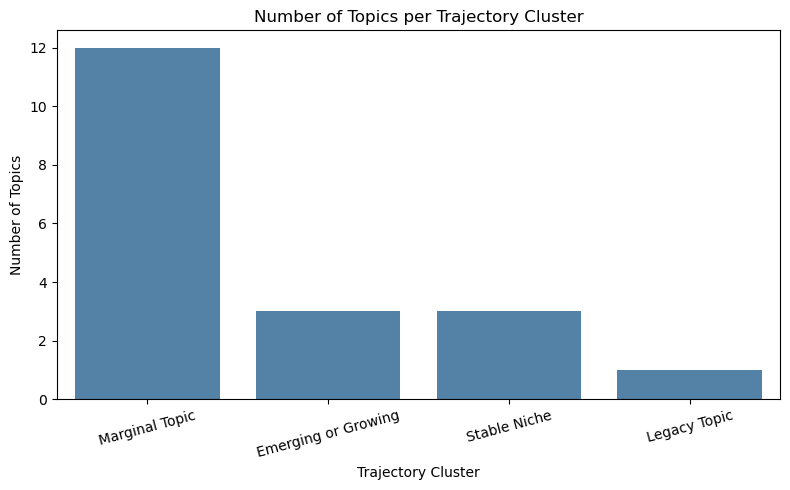

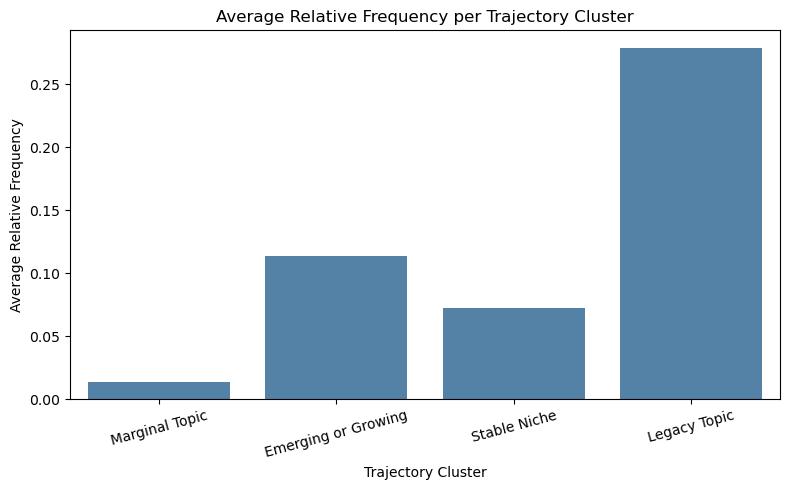

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of topics per trajectory cluster
topic_counts = trajectory_clustered_df["trajectory_label"].value_counts().reset_index()
topic_counts.columns = ["trajectory_label", "num_topics"]

# Calculate average relative frequency per cluster
cluster_avg_freq = (
    trajectory_clustered_df
    .drop(columns=["topic", "cluster", "trajectory_label"])
    .mean(axis=1)
    .groupby(trajectory_clustered_df["trajectory_label"])
    .mean()
    .reset_index()
)
cluster_avg_freq.columns = ["trajectory_label", "average_relative_frequency"]

# Merge the two summaries
summary_df = pd.merge(topic_counts, cluster_avg_freq, on="trajectory_label")

# Plot 1: Number of Topics per Trajectory Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_df, x="trajectory_label", y="num_topics", color="steelblue")
plt.title("Number of Topics per Trajectory Cluster")
plt.ylabel("Number of Topics")
plt.xlabel("Trajectory Cluster")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Average Relative Frequency per Trajectory Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_df, x="trajectory_label", y="average_relative_frequency", color="steelblue")
plt.title("Average Relative Frequency per Trajectory Cluster")
plt.ylabel("Average Relative Frequency")
plt.xlabel("Trajectory Cluster")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

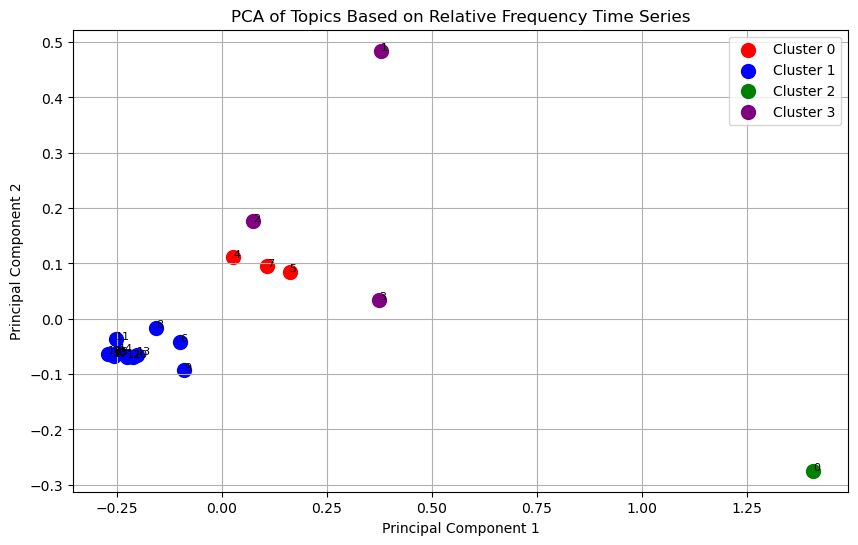

In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Ensure column names are all strings
topic_time_df.columns = topic_time_df.columns.astype(str)

# Step 2: Select only numeric columns for PCA
numeric_columns = topic_time_df.select_dtypes(include='number').columns
data_for_pca = topic_time_df[numeric_columns].drop(columns=['cluster'], errors='ignore')

# Step 3: Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Step 4: Prepare plot data
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=topic_time_df.index)
pca_df['cluster'] = topic_time_df['cluster']

# Step 5: Plot
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

for cluster in sorted(pca_df['cluster'].unique()):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}', s=100, color=colors[cluster % len(colors)])

    # Annotate topic IDs
    for topic in cluster_data.index:
        plt.text(cluster_data.loc[topic, 'PC1'],
                 cluster_data.loc[topic, 'PC2'],
                 str(topic), fontsize=8)

plt.title("PCA of Topics Based on Relative Frequency Time Series")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

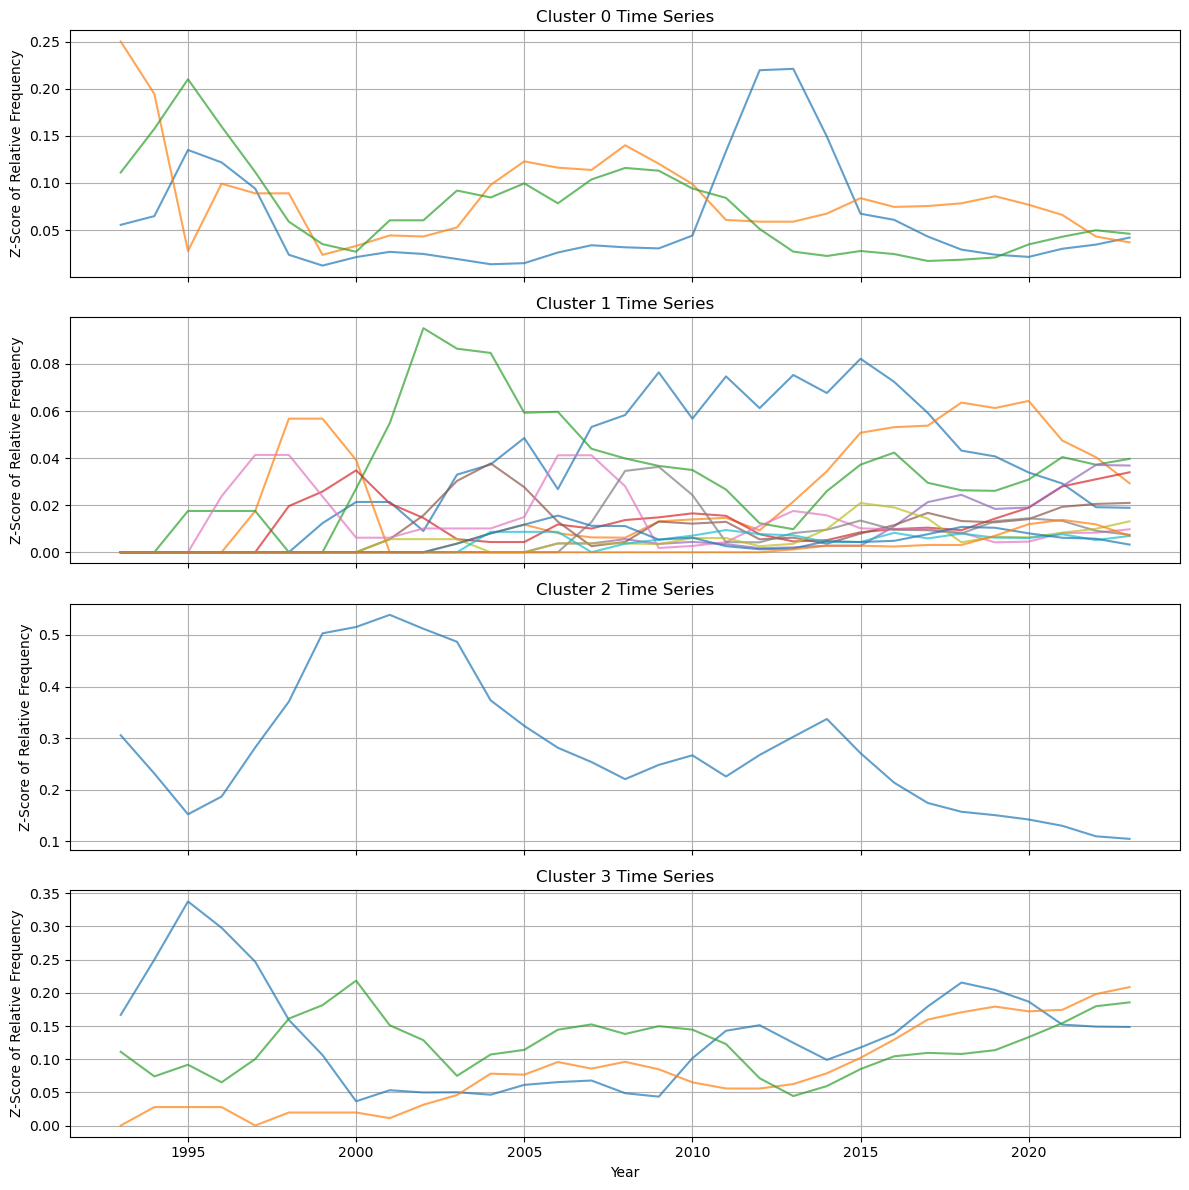

In [102]:
import matplotlib.pyplot as plt

# Ensure column names are all strings for consistency
topic_time_df.columns = topic_time_df.columns.astype(str)

# Select only numeric year columns (exclude 'cluster')
numeric_cols = topic_time_df.select_dtypes(include='number').columns
year_cols = [col for col in numeric_cols if col != 'cluster']
years = list(map(int, year_cols))  # convert year strings to ints for x-axis

# Get unique clusters
unique_clusters = sorted(topic_time_df['cluster'].unique())

# Create subplots, one per cluster
fig, axes = plt.subplots(len(unique_clusters), 1, figsize=(12, 3 * len(unique_clusters)), sharex=True)

# Handle case when there's only one cluster
if len(unique_clusters) == 1:
    axes = [axes]

# Plot time series for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = topic_time_df[topic_time_df['cluster'] == cluster]
    ax = axes[i]
    
    for topic in cluster_data.index:
        values = cluster_data.loc[topic, year_cols].values
        ax.plot(years, values, label=f'Topic {topic}', alpha=0.7)
    
    ax.set_title(f"Cluster {cluster} Time Series")
    ax.set_ylabel("Z-Score of Relative Frequency")
    ax.grid(True)

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()